# Colormap comparisons

Implementation based on scripts found here:

http://matplotlib.org/users/colormaps.html

In [2]:
% matplotlib inline

import numpy as np
from skimage import color
from matplotlib import cm
from colorspacious import cspace_converter # pip install colorspacious
import matplotlib.pyplot as plt

## Gradients

In [3]:
def plot_gradient(cmap_name):
    """Plot colors in a colormap and the perceptual lightness"""

    # Indices to step through colormap
    x = np.linspace(0.0, 1.0, 100)

    gradient = np.linspace(0, 1, 256)
    gradient = np.vstack((gradient, gradient))
    
    fig, ax = plt.subplots(nrows=3, ncols=1) # One for cmap_name and one for gray
    fig.subplots_adjust(top=0.99, bottom=0.01, left=0.2, right=0.99, wspace=0.05)

    # Get RGB values
    rgb = cm.get_cmap(plt.get_cmap(cmap_name))(x)[np.newaxis, : , :3]

    # Get colormap in CAM02-UCS colorspace. We want the lightness
    lab = cspace_converter("sRGB1", "CAM02-UCS")(rgb)
    L = lab[0, : , 0]
    L = np.float32(np.vstack((L, L, L)))
    
    ax[0].plot(L[0, :])
    ax[0].axis([0, 100, 0, np.max(L[0, :]) + 10])
    ax[1].imshow(gradient, aspect='auto', cmap=plt.get_cmap(cmap_name))
    ax[2].imshow(L, aspect='auto', cmap='binary_r', vmin=0, vmax=100.)
    pos = list(ax[0].get_position().bounds)
    x_text = pos[0] - 0.01
    y_text = pos[1] + pos[3]/2.
    #fig.text(x_text, y_text, cmap_name, va='center', ha='right', fontsize=10)
    
    ax[0].set_axis_off()
    ax[1].set_axis_off()
    ax[2].set_axis_off()
        
    plt.savefig('assets/images/cmap_'+cmap_name+'_lightness.png', bbox_inches='tight', transparent=True)

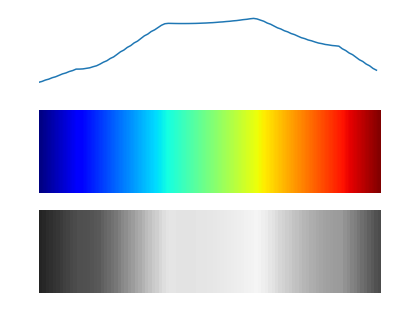

In [4]:
plot_gradient('jet')

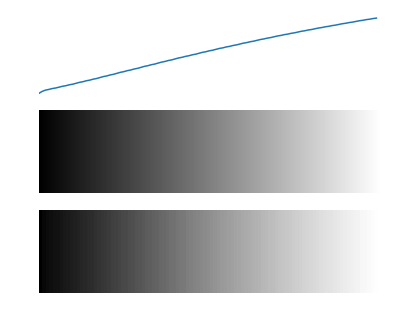

In [5]:
plot_gradient('gray')

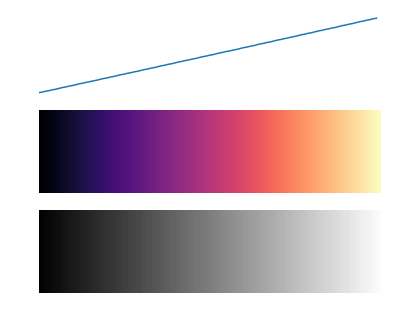

In [6]:
plot_gradient('magma')

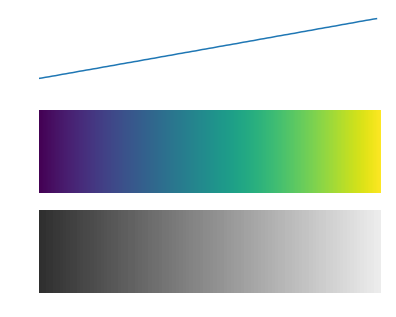

In [7]:
plot_gradient('viridis')

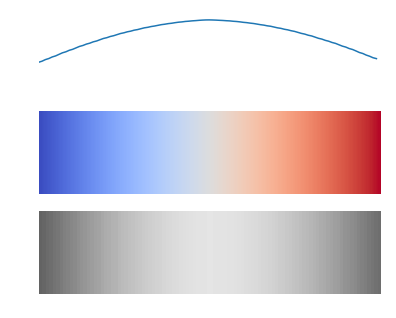

In [8]:
plot_gradient('coolwarm')